# Deteksi Hepatitis MLP

## Import Library

In [38]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# MLP
from sklearn.neural_network import MLPClassifier

## Load Data

In [2]:
df = pd.read_csv('HepatitisDataset.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


## Data Preprocessing

### Remove Unnecessary Columns

In [12]:
df = df.drop('Unnamed: 0', axis=1)

### Missing Values

#### Missing Values Visualization

<AxesSubplot:>

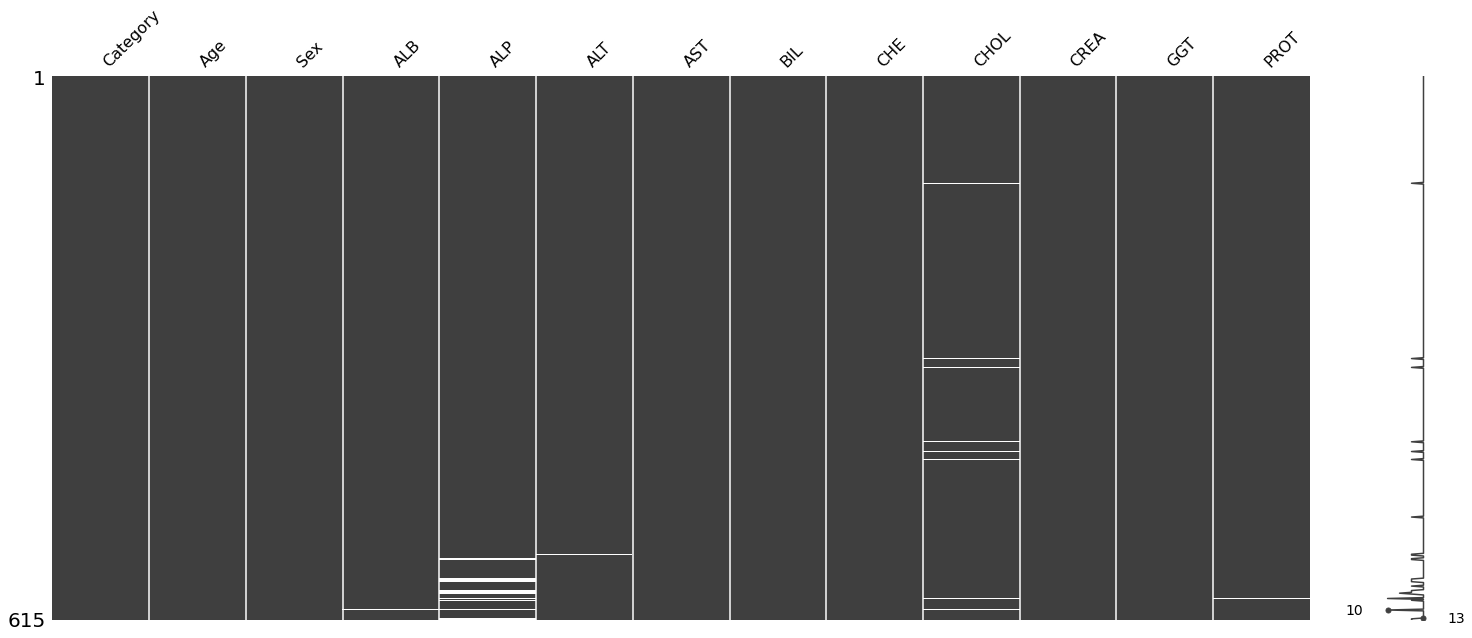

In [13]:
msno.matrix(df)

#### Missing values per category

In [14]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

#### Missing values percentage per category

In [15]:
df.isnull().sum() * 100 / len(df)

Category    0.000000
Age         0.000000
Sex         0.000000
ALB         0.162602
ALP         2.926829
ALT         0.162602
AST         0.000000
BIL         0.000000
CHE         0.000000
CHOL        1.626016
CREA        0.000000
GGT         0.000000
PROT        0.162602
dtype: float64

Karena data yang kosong atau null terbilang sedikit kami memutuskan untuk menghapus kolom yang memiliki missing values.

In [ ]:
df = df.dropna(inplace=True)

### Convert to Numerical Data

In [16]:
df['Sex'].replace('m', 1, inplace=True)
df['Sex'].replace('f', 0, inplace=True)
df['Category'].replace({"1=Hepatitis", "2=Fibrosis", "3=Cirrhosis"}, 1, inplace=True)
df['Category'].replace({"0=Blood Donor", "0s=suspect Blood Donor"}, 0, inplace=True)

## Data Visualization

### Macam-macam Feature

Terdapat beberapa macam feature yaitu:

#### Caterogical Feature

Categorical feature adalah feature yang tediri dari dua kategori. Misalnya, jenis kelamin yang mana memiliki 2 kategori yaitu pria dan wanita. Feature ini biasanya juga disebut sebagai Numerical Feature

#### Ordinal Feature

Ordinal feature mirip dengan categorical feature namun feature ini dapat diurutkan nilainya. Misalnya kepuasan konsumen yang memiliki 4 kategori yang dapat dirutkan yaitu tidak puas, puas sedang, puas dan sangat puas.

#### Continuous Feature

Continous feature adalah feature yang berisi angka. Misalnya, umur.

### Feature Analyze

#### Age -> Continuous Feature

In [42]:

print('Oldest Age:', df['Age'].max(),'Years')
print('Youngest Age:', df['Age'].min(),'Years')
print('Average Age:', df['Age'].mean(),'Years')

Oldest Age: 77 Years
Youngest Age: 19 Years
Average Age: 47.40813008130081 Years


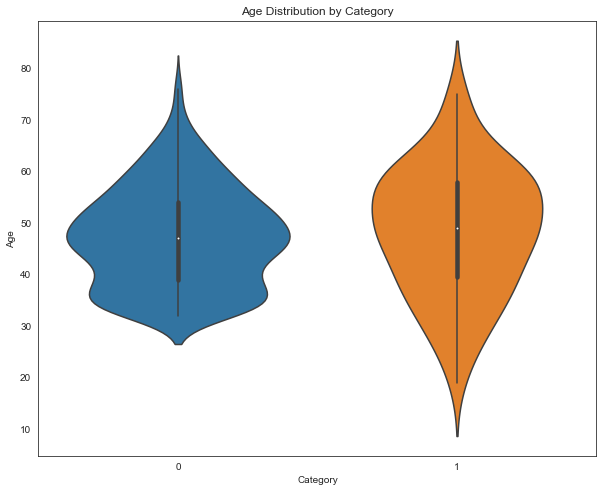

In [53]:
plt.figure(figsize=(10, 8))
sns.set_style('white')
sns.violinplot(x=df['Category'], y=df['Age'])
plt.title('Age Distribution by Category')
plt.show()

#### Sex -> Categorical Feature

### Correlation Matrix

<AxesSubplot:>

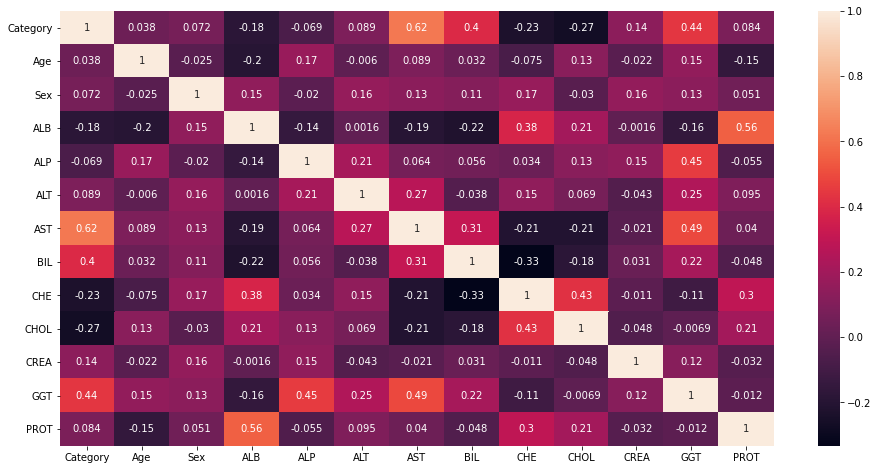

In [18]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

In [41]:
pd.DataFrame([["0 < r <= 0.19", "Very Low Correlation"],["0.2 <= r <= 0.39", "Low Correlation"], ["0.4 < r <= 0.59", "Modderate Correlation"], ["0.6 < r <= 0.79", "High Correlation"], ["0.8 < r <= 1.0", "Very High Correlation"] ], columns=['Scale of Correlation', 'Value'])

,Scale of Correlation,Value
0,0 < r <= 0.19,Very Low Correlation
1,0.2 <= r <= 0.39,Low Correlation
2,0.4 < r <= 0.59,Modderate Correlation
3,0.6 < r <= 0.79,High Correlation
4,0.8 < r <= 1.0,Very High Correlation


Karena 